# Investing in Movie Industry: Unlocking High Performing Genres

| Individual Assignment                 | 2024-25 |
| --------------------- | ----------------------- |
| Level                 | 7 (Postgraduate)        |
| Course name           | MSc Business Analytics  |
| Module code           | MN5813                  |
| Module tutor          | Alex Reppel             |
| Assignment number     | 2 _(Individual assignment)_  |
| Assignment title      | Investing in Movie Industry: Unlocking High Performing Genres  |

| Candidate number                  |
| ------------------------------------ |
|2505080 |

## Project summary / Literature review

The data for this project is based on the movies dataset. A lot of academic articles have analysed similar datasets, focusing on different modes and techniques of analysis. The dataset can be used for analysis of sentiments, positive or negative reviews, of movies (Ali, Abd El Hamid, and Youssif, 2019), analysing data based on countries (Xiao, Cheng, and Kim, 2021), predicting movie grosses (Zhang, and Skiena, 2009), and analysing gender stereotypes in the movie industry (Kumar, Goh, Tan, and Siew, 2022). The focus of this project is to assist investors/producers in taking investment decisions which involves conducting analysis of ROI (Return On Investment) based on genres. ROI provides a simple tool for examining performance (Friedlob, and Plewa Jr, 1996). Therefore it is easier for investors to know how investments have performed in each of the top genres based on ROI.

## Generative AI

Generative AI has been used in this project, but only to explore the various libraries and functions that can better assist in reaching the desired outcomes. The tool used is OpenAI ChatGPT (Version 2).

## Introduction

This project includes various actions such as data cleaning, data wrangling, data analysis, and data visualization on Python by importing the required libraries.

One of the most important aspect that leads to the success of any movie is money/funding. But at the same time, since the investment amount in movies is generally high, it is important to take into account all the necessary details. Producers need a model that could help them in an attempt to reduce the risks of their investment going wrong (Sinha, Krishna, Shedge, and Sinha, 2017). Hence the aim of this project focuses on assisting investors/producers in making decisions when it comes to investing in the movie industry. 

To achieve this aim, the first objective is to analyse the profits of the movie industry over the years and check if it is a good decision to invest into the industry.

Second, to interpret which genres provide the most Return on Investment (ROI).

Third, to check the various aspects among those top genres to help answer questions such as what will be the budget/revenue of a particular genre, and what is the level of risk of that genre.

This data will help reach the aim of this project and provide investors/producers with the required information of where and how much to invest.


## Methodology

This project has been completed by using various methods/techniques while performing data cleaning, data wrangling, data analysis, and data visualisation. 

Data cleaning: Various actions such as checking for duplicate entries, handling missing values, converting data type of columns and renaming columns. In order to perform these actions, functions such as duplicated().sum(), .fillna(), .astype(), .rename() were used respectively so that it is easier for readers to analyse cleaned data and eliminate unwanted data.

Data wrangling: After cleaning the data, a new column was made called as “revenue_group” to make it easier to know the level of collection of each movie (high, medium or low). This was made by using pd.cut() and allotting bins and labels to the values. Another column was also created by combining two existing columns (movie name and genre) to provide information about each movie’s genre. Finally, to get the movie’s age pd.to_datetime() was utilized to get the current year and subtract it with the release date.

Data analysis and Data visualisation: First, to analyse the profit of movies over the years, a “profit” column was created by subtracting values of “revenue” and “budget” columns. And using .groupby() to group profit by years. To visualise this, a seaborn line plot was created. Second, aonther column “return_on_investment” was created to calculate the top 10 ROI based on each genre by using .groupby() function and grouping with genre. An annotated seaborn bar plot was used for visualising this. Lastly, a new dataframe was created with only top 5 genres based on ROI and value_counts. The data of these 5 genres was compared to assist in gaining knowledge of the risk level involved in investing in these genres by using small multiples plot which is built on top of seaborn and matplotlib.


## Setup

### Steps to run this Notebook

This notebook is available in a public repository which can be reached through the following link: https://github.com/RahulB-4/Individual-Project.git
Download the file named "Individual-Project.ipynb" from the repository. The dataset used for this project is also available in the same repository under the name "movies.csv" which must also be downloaded.

Alternatively, the dataset can also be downloaded from kaggle. 
Dataset link: https://www.kaggle.com/datasets/danielgrijalvas/movies

After downloading the dataset, the following two files must be placed in one folder:-
1. Individual-Project.ipynb
2. movies.csv

Once the file is run, the following outputs will be visible in the folder:-
1. movies_cleaned.csv
2. movies_2_cleaned.csv
3. movies_3_cleaned.csv
4. Three images in png format showcasing the visualisations.

### Import necessary libraries

In [16]:
#Importing the necessary libraries.
import pandas as pd
import numpy as np

### Load data

In [18]:
data_source = "https://www.kaggle.com/datasets/danielgrijalvas/movies"

In [19]:
#Reading the dataset as a csv file. 
movies = pd.read_csv("movies.csv")

### Convert into DataFrame

In [21]:
#Checking if it has worked by generating the first 5 rows (.head()).
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [22]:
#Checking the basic information (type) of each column.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Data management

### Data cleaning

In [25]:
#Checing the number of duplicates (if any) in the dataframe.
movies.duplicated().sum()

0

In [26]:
#Renaming the required columns for better clarity by using .rename().
movies = movies.rename(columns = {"name": "movie_name", "rating": "content_rating", "released": "release_date", "score": "IMDB_rating", "votes": "vote_count", "gross": "revenue", "company": "production_company"})

#### Handling missing values

In [28]:
#Checking for the number of missing values (if any) in each column.
movies.isna().sum()

movie_name               0
content_rating          77
genre                    0
year                     0
release_date             2
IMDB_rating              3
vote_count               3
director                 0
writer                   3
star                     1
country                  3
budget                2171
revenue                189
production_company      17
runtime                  4
dtype: int64

In [29]:
#Filling the missing values of "content_rating" column as "Not Rated" by using .fillna().
movies["content_rating"] = movies["content_rating"].fillna("Not Rated")

In [30]:
#Filling the missing values of "release_date" by using .loc[] and mentioning the index number as well as the column name.
movies.loc[5728, "release_date"] = "October 29, 2010 (United States)"
movies.loc[5730, "release_date"] = "February 12, 2010 (United States)"

The value/date being filled is taken from the official IMDB website. 

In [32]:
#Filling missing values of "IMDB_rating" the same way as there are only 3 missing values for this column.
movies.loc[movies["IMDB_rating"].isnull()]

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count,director,writer,star,country,budget,revenue,production_company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,Not Rated,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [33]:
#Filling the missing values for "IMDB_rating" and "vote_count" by using .loc[] and mentioning the row and column name.
movies.loc[7661, "IMDB_rating"] = 7.1
movies.loc[7662, "IMDB_rating"] = 0
movies.loc[7666, "IMDB_rating"] = 8.4 
movies.loc[7661, "vote_count"] = 19
movies.loc[7662, "vote_count"] = 0
movies.loc[7666, "vote_count"] = 9

Due to limited/no data available on the movie "The Robinsons"(2020), we can assume that no users have voted on IMDB. 
Hence we can fill the "vote_count" as well as "IMDB_rating" values for this movie as 0.

When locating missing values for "IMDB_rating", missing values for "vote_count" is also found as they belonged to the same row and also had only 3 missing values.
The values being filled have been taken from the official IMDB website.

In [35]:
#Locating the 3 missing values for "writer" in order to fill them after researching about those movies.
movies.loc[movies["writer"].isnull()]

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count,director,writer,star,country,budget,revenue,production_company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [36]:
#Filling the missing values of "writer" by using .loc[] and mentioning the row and column name.
movies.loc[1820, "writer"] = "Derek Jarman"
movies.loc[5834, "writer"] = "No Writer"
movies.loc[7655, "writer"] = "Xu Zhonglin & Xie Xiying"

"The Trip" movie has no credited writer as majority of the film is improvised according to IMDB. Hence we can fill this value with "No Writer".
The values being filled have been taken from the official IMDB website.

In [38]:
#Locating the 1 missing value for "star" to research and fill that missing value.
movies.loc[movies["star"].isnull()]

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count,director,writer,star,country,budget,revenue,production_company,runtime
474,The Business of Show Business,Not Rated,History,1983,"February 15, 1983 (Canada)",8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0


In [39]:
#Filling the missing value of "star" by gaining information from the official IMDB website.
movies["star"] = movies["star"].fillna("Tom Logan")

In [40]:
#Locating the 3 missing values of "country" to research and fill them.
movies.loc[movies["country"].isnull()]

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count,director,writer,star,country,budget,revenue,production_company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,"October 29, 2010 (United States)",5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,"February 12, 2010 (United States)",5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
7615,Clinton Road,Not Rated,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [41]:
#Filling the missing value of "country" by gaining information from the official IMDB website.
movies["country"] = movies["country"].fillna("United States")

In [42]:
#Filling the missing values of "production_company" column as "Unknown" by using .fillna().
movies["production_company"] = movies["production_company"].fillna("Unknown")
movies["production_company"]

0                    Warner Bros.
1               Columbia Pictures
2                       Lucasfilm
3              Paramount Pictures
4                  Orion Pictures
                  ...            
7663                      Unknown
7664    Cactus Blue Entertainment
7665             Embi Productions
7666                      Unknown
7667                  PK 65 Films
Name: production_company, Length: 7668, dtype: object

In [43]:
#Locating the 4 missing values of "runtime" to research and fill them.
movies.loc[movies["runtime"].isnull()]

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count,director,writer,star,country,budget,revenue,production_company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,"October 29, 2010 (United States)",5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,United States,NaN,NaN,Unknown,NaN
5730,The Wolfman,R,Drama,2010,"February 12, 2010 (United States)",5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,United States,NaN,NaN,Unknown,NaN
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,NaN
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


In [44]:
#Filling the missing values of "runtime" column by using .loc[] and mentioning the row and column name.
movies.loc[5728, "runtime"] = 90
movies.loc[5730, "runtime"] = 103
movies.loc[6195, "runtime"] = 91
movies.loc[7665, "runtime"] = 110

The "runtime" values being filled have been taken from the official IMDB website.

In [46]:
#Here, .groupby() groups the data based on the "genre", and "year" columns.
#.transform("median") applies the median value (In this case, median "budget" value) while keeping the original dataframe shape.
#This grouped median value then replaces the missing budget values by using .fillna().
median_budget = movies.groupby(["genre", "year"])["budget"].transform("median")
movies["budget"] = movies["budget"].fillna(median_budget)

The reason for taking median is because the budget column had fluctuating values which would influence the mean value (if mean would be considered).
Genre is considered because comedy only movies require high budget whereas documentary, horror or thriller require lower budgets (Kim and Kim, 2018).
Year makes a difference because of inflation.

In [48]:
#If there is not enough evidence for median values to be generated based on the grouped columns, those values will not be generated. So now the grouped columns must be altered.
median_budget = movies.groupby(["star"])["budget"].transform("median")
movies["budget"] = movies["budget"].fillna(median_budget)

Budget has been grouped by star because big stars charge high fees which increases the budget (Ravid, 1999).

In [50]:
#But there are still missing values, so:-
median_budget = movies.groupby(["production_company"])["budget"].transform("median")
movies["budget"] = movies["budget"].fillna(median_budget)

Big production companies are able to make movies with higher budgets as they have managed to increase thier revenue through external aspects like theme parks, merchandising, and others (Scott, 2002).

In [52]:
#Finally, we group by the "country" column.
median_budget = movies.groupby(["country"])["budget"].transform("median")
movies["budget"] = movies["budget"].fillna(median_budget)
movies["budget"]

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664    59500000.0
7665       58750.0
7666       15000.0
7667    15250000.0
Name: budget, Length: 7668, dtype: float64

American films have high budget due to the investors trusting the projects. The same is not the case for other countries (Teti, 2013). Hence, the budget of movies depends on "country" values as well. 

In [54]:
#Now we do the same to fill the missing "revenue" values.
median_revenue = movies.groupby(["year", "genre"])["revenue"].transform("median")
movies["revenue"] = movies["revenue"].fillna(median_revenue) 

The reason for taking median is because the revenue column had fluctuating values which would influence the mean value (if mean would be considered).
The reason for grouping with genre is because consumer choices depend on factors among which genre exists (Garcia-del-Barrio and Zarco, 2017).
The mean annual revenue in 1991, USA, was 20.4 million while in 1997 it was 30.6 million (Teti, 2013). Hence year also plays a role in revenue.

In [56]:
#Altering the grouped columns:-
median_revenue = movies.groupby(["budget", "star"])["revenue"].transform("median")
movies["revenue"] = movies["revenue"].fillna(median_revenue)

The box office revenue fluctuates depending on the budget as well as the star of the movie (Garcia-del-Barrio and Zarco, 2017). Therefore revenue has been grouped by "budget" and "star".

In [58]:
#But there are still missing "revenue" values so:-
median_revenue = movies.groupby(["country"])["revenue"].transform("median")
movies["revenue"] = movies["revenue"].fillna(median_revenue)
movies["revenue"]

0        46998772.0
1        58853106.0
2       538375067.0
3        83453539.0
4        39846344.0
           ...     
7663     84484941.0
7664       413378.0
7665     84484941.0
7666     84484941.0
7667        13266.0
Name: revenue, Length: 7668, dtype: float64

"country" is taken into account as the total revenue highly depends on the geographical location as United States, Canada, Australia, France, Germany, Mexico, Spain, and the United Kingdom collectively account for over 75% of worldwide cinema box-office revenue (Walls and McKenzie, 2012).

In [60]:
#Checking if all the missing values have been filled.
movies.isna().sum()

movie_name            0
content_rating        0
genre                 0
year                  0
release_date          0
IMDB_rating           0
vote_count            0
director              0
writer                0
star                  0
country               0
budget                0
revenue               0
production_company    0
runtime               0
dtype: int64

#### Additional cleaning and data type conversion

In [62]:
#.apply(lambda x: f"{x // 1000}" if x % 1000 == 0 else f"{x / 1000: .1f}") this code applies the lambda function where the value is divided by 1,000 and if it is divisible by 1,000, result will be a whole number, else result will be a float with one decimal number.
#.astype(float) converts the data type to float.
movies["vote_count"] = movies["vote_count"].apply(lambda x: f"{x // 1000}" if x % 1000 == 0 else f"{x / 1000: .1f}")

Converting the "vote_count" column into thousands by using lambda function for ease in reading the values.

In [64]:
#Checking if the above code has worked.
movies["vote_count"]

0        927.0
1         65.0
2       1200.0
3        221.0
4        108.0
         ...  
7663       0.0
7664       0.0
7665       0.0
7666       0.0
7667       0.0
Name: vote_count, Length: 7668, dtype: object

In [65]:
#.apply(lambda x: f"{x // 1000000}" if x % 1000000 == 0 else f"{x / 1000000: .1f}") this code applies the lambda function where the value is divided by 1,000,000 and if it is divisible by 1,000,000, result will be a whole number, else result will be a float with one decimal number.
#.astype(float) converts the data type to float.
movies["budget"] = movies["budget"].apply(lambda x: f"{x // 1000000}" if x % 1000000 == 0 else f"{x / 1000000: .1f}")
movies["budget"] = movies["budget"].astype(float)

Converting the "budget" column into millions by using lambda function for ease in reading the values. After which the column is also converted into float to enable various actions that can be performed.

In [67]:
#Checing if the above code worked.
movies["budget"]

0       19.0
1        4.5
2       18.0
3        3.5
4        6.0
        ... 
7663     0.0
7664    59.5
7665     0.1
7666     0.0
7667    15.2
Name: budget, Length: 7668, dtype: float64

In [68]:
#.apply(lambda x: f"{x // 1000000}" if x % 1000000 == 0 else f"{x / 1000000: .1f}") this code applies the lambda function where the value is divided by 1,000,000 and if it is divisible by 1,000,000, result will be a whole number, else result will be a float with one decimal number.
movies["revenue"] = movies["revenue"].apply(lambda x: f"{x // 1000000}" if x % 1000000 == 0 else f"{x / 1000000: .1f}")

In [69]:
movies["revenue"] = movies["revenue"].astype(float)
movies["revenue"]

0        47.0
1        58.9
2       538.4
3        83.5
4        39.8
        ...  
7663     84.5
7664      0.4
7665     84.5
7666     84.5
7667      0.0
Name: revenue, Length: 7668, dtype: float64

Converting the "revenue" column into millions by using lambda function for ease in reading the values. After which the column is also converted into float to enable performing of various actions.

In [71]:
#Renaming the "vote_count", "budget", and "revenue" columns by adding (in thousands), (in millions), and (in millions) to the column names respectively.
movies = movies.rename(columns = {"vote_count": "vote_count (in thousands)", "budget": "budget (in millions)", "revenue": "revenue (in millions)"})

In [72]:
#Converting the "runtime" column into integer type.
movies["runtime"] = movies["runtime"].astype(int)
movies["runtime"]

0       146
1       104
2       124
3        88
4        98
       ... 
7663     90
7664     90
7665    110
7666    120
7667    102
Name: runtime, Length: 7668, dtype: int32

### Data wrangling

In [74]:
#Checking maximum revenue to create bins and labels accordingly.
movies["revenue (in millions)"].max()

2847.2

In [75]:
#pd.cut() is a function that creates bins or intervals.
#bins mentions the edges of bins or intervals. Example: (0.0, 5.0) means revenue between 0.0 and 5.0.
#labels specifies the labels to be alloted to the corresponding bins.
movies["revenue_group"] = pd.cut(movies["revenue (in millions)"], bins = [0.0, 5.0, 35.0, 200.0, 2900.0], labels = ["Low Revenue", "Moderate Revenue", "High Revenue", "Very High Revenue"])
movies.head()

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count (in thousands),director,writer,star,country,budget (in millions),revenue (in millions),production_company,runtime,revenue_group
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,47.0,Warner Bros.,146,High Revenue
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58.9,Columbia Pictures,104,High Revenue
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538.4,Lucasfilm,124,Very High Revenue
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83.5,Paramount Pictures,88,High Revenue
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39.8,Orion Pictures,98,High Revenue


In [76]:
#Merging the columns "movie" and "genre" to make a new column named "movie_and_genre".
movies["movie_and_genre"] = movies["movie_name"] + " - " + movies["genre"]

In [77]:
#Checking if the above code has worked.
movies.head()

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count (in thousands),director,writer,star,country,budget (in millions),revenue (in millions),production_company,runtime,revenue_group,movie_and_genre
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,47.0,Warner Bros.,146,High Revenue,The Shining - Drama
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58.9,Columbia Pictures,104,High Revenue,The Blue Lagoon - Adventure
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538.4,Lucasfilm,124,Very High Revenue,Star Wars: Episode V - The Empire Strikes Back...
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83.5,Paramount Pictures,88,High Revenue,Airplane! - Comedy
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39.8,Orion Pictures,98,High Revenue,Caddyshack - Comedy


In [78]:
#By using pandas' to_datetime("today").year function, the current year is obtained.
#This current year is subtracted by the values in the "year" column to get get the movies' age.
current_year = pd.to_datetime("today").year
movies["movie_age"] = current_year - movies["year"]
movies.head()

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count (in thousands),director,writer,star,country,budget (in millions),revenue (in millions),production_company,runtime,revenue_group,movie_and_genre,movie_age
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,47.0,Warner Bros.,146,High Revenue,The Shining - Drama,45
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58.9,Columbia Pictures,104,High Revenue,The Blue Lagoon - Adventure,45
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538.4,Lucasfilm,124,Very High Revenue,Star Wars: Episode V - The Empire Strikes Back...,45
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83.5,Paramount Pictures,88,High Revenue,Airplane! - Comedy,45
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39.8,Orion Pictures,98,High Revenue,Caddyshack - Comedy,45


## Data analysis and Data visualisation

In [80]:
#Calculating and creating a new "profit (in millions)" column by subtracting the revenue and the budget of the movies.
movies["profit (in millions)"] = movies["revenue (in millions)"] - movies["budget (in millions)"]
movies.head()

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count (in thousands),director,writer,star,country,budget (in millions),revenue (in millions),production_company,runtime,revenue_group,movie_and_genre,movie_age,profit (in millions)
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,47.0,Warner Bros.,146,High Revenue,The Shining - Drama,45,28.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58.9,Columbia Pictures,104,High Revenue,The Blue Lagoon - Adventure,45,54.4
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538.4,Lucasfilm,124,Very High Revenue,Star Wars: Episode V - The Empire Strikes Back...,45,520.4
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83.5,Paramount Pictures,88,High Revenue,Airplane! - Comedy,45,80.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39.8,Orion Pictures,98,High Revenue,Caddyshack - Comedy,45,33.8


In [81]:
#Creating a dataframe which shows the total profit per year.
#Here, .agg() calculates the total profit (because "sum" is mentioned) which is grouped by the "year" by using .groupby().
profit = movies.groupby("year").agg({"profit (in millions)": "sum"}).reset_index()
profit.head()

,year,profit (in millions)
0,1980,1791.8
1,1981,1522.3
2,1982,1822.4
3,1983,1595.0
4,1984,1733.7


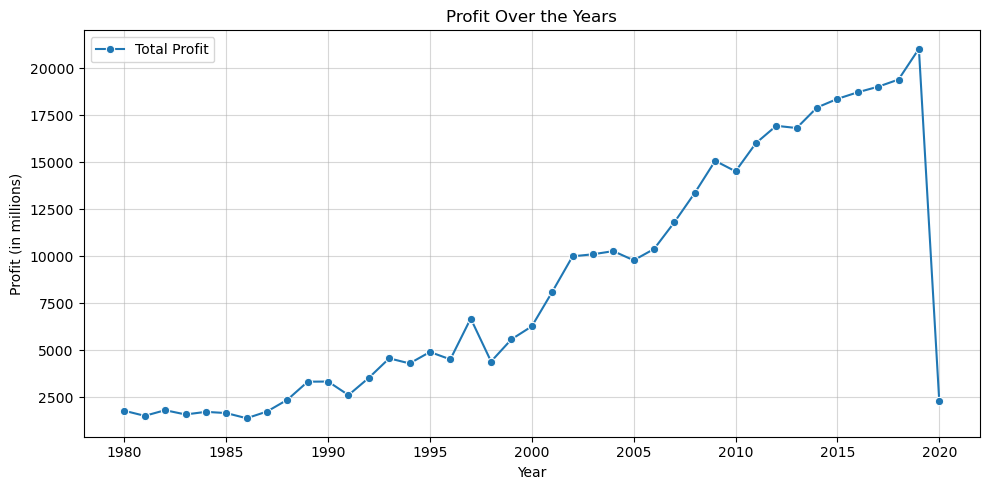

In [82]:
#Importing necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))  #Sets the size of the figure. 
sns.lineplot(data = profit, x = "year", y = "profit (in millions)", marker = "o", label = "Total Profit")  #sns.lineplot() creates a line plot with x and y values along with the marker and label of the graph, using seaborn library.
plt.title("Profit Over the Years")  #Sets the title of the graph.
plt.xlabel("Year")  #Labels the X axis.
plt.ylabel("Profit (in millions)")  #Labels the Y axis.
plt.grid(visible = True, alpha = 0.5)  #Sets the grid of the graph (alpha adjusts the transparency).
plt.legend()  #Provides a legend.
plt.tight_layout()  #Automatically adjusts the overall layout of the graph.
plt.savefig("profit_over_the_years.png", format = "png", dpi = 300)  #Exports the visualisation as an image file.
plt.show()

This lineplot portrays the profit of movies over the years. X axis shows the years whereas Y axis shows the profit (in millions).
As it can be seen, the profit is on an upward trend. Only the year 2020 shows a massive drop in the profits but that is due to COVID.
This plot shows that the movies industry id doing good overall (due to the upward profit trend).
So, the movie industry can be considered as a good option for investors to invest in.

In [84]:
#Calculating the Return on Investment (ROI) by dividing the profit by budget and multiplying the result by 100.
movies["return_on_investment"] = (movies["profit (in millions)"] / movies["budget (in millions)"]) * 100
movies["return_on_investment"] = movies["return_on_investment"].round()
movies["return_on_investment"]

0         147.0
1        1209.0
2        2891.0
3        2286.0
4         563.0
         ...   
7663        inf
7664      -99.0
7665    84400.0
7666        inf
7667     -100.0
Name: return_on_investment, Length: 7668, dtype: float64

ROI is easier to compare the returns when budget is very vast, helping investors in decision making.

In [86]:
#np.inf is positive infinity while -np.inf is negative infinity which are both converted to 0 by using .replace().
movies["return_on_investment"] = movies["return_on_investment"].replace([np.inf, -np.inf], 0)

"inf" can be seen under this ROI column as few values under "budget" column are 0. So "inf" was converted to 0 in order to get accurate mean value of ROI.

In [88]:
#Generating the average ROI by each genre and sorting it from the highest to lowest by using .sort_values().
#Using .nlargest(10) to get the top 10 genres with most ROI.   
roi_by_genre = movies.groupby("genre")["return_on_investment"].mean().sort_values(ascending = False)
top_genres = roi_by_genre.nlargest(10)
top_genres

genre
History      2733.000000
Horror       1577.546584
Family        707.818182
Sci-Fi        684.500000
Animation     252.896450
Thriller      214.812500
Drama         206.665349
Comedy        169.829399
Adventure     160.964871
Fantasy       159.090909
Name: return_on_investment, dtype: float64

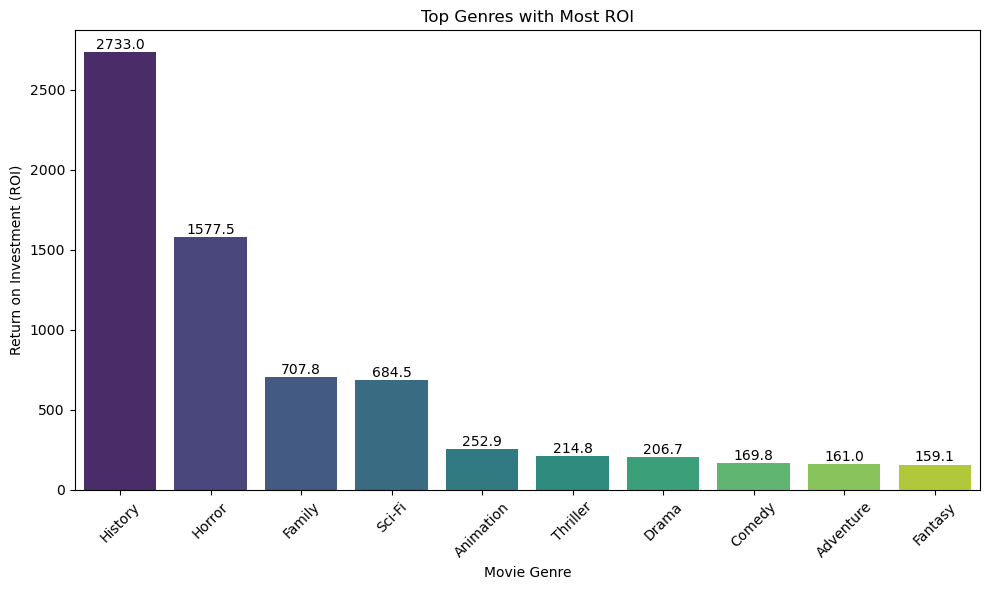

In [89]:
plt.figure(figsize = (10, 6))  #Sets the size of the figure.
bar = sns.barplot(x = top_genres.index,
                  y = top_genres.values,
                  hue = top_genres.index,
                  palette = "viridis") #sns.barplot() creates a bar plot with x and y values along with the colour of the graph, using seaborn library.
plt.xticks(rotation = 45) #Rotates the values of X axis by 45 degrees.
plt.title("Top Genres with Most ROI")  #Sets the title of the graph.
plt.xlabel("Movie Genre")  #Sets the label for X axis.
plt.ylabel("Return on Investment (ROI)")  #Sets the label for Y axis.
plt.tight_layout()  #Automatically adjusts the elements in the graph to make the layout more appealing.
for index, value in enumerate(top_genres.values):  
    plt.text(x = index,  #Positioning the annotated text at the center of each bar.
             y = value + 0.1,  #Plotting annotations slightly above the bars.
             s = f"{value:.1f}",  #Including only one decimal point for the annotations.
             ha = "center",  
             va = "bottom",  #Horizontal Alignment and Vertical Alignment (ha, va) aligns the text accordingly.
             fontsize = 10,
             color = "black") 
plt.savefig("Top Genres with Most ROI.png", format = "png", dpi = 300)  #Exports visualisation as an image file.
plt.show()

This bar plot shows the genres with highest ROI with X axis showing the Movie Genre and Y axis Showing the ROI.
As it is seen, the genre "History" has the most ROI with a big margin as compared to the other top genres.
This provides insights to investors as to which genre is successful in order for them to invest.

Its is now required to see the reason why "History" has the most ROI and see other factors related to the success of these genres.

In [92]:
#Creating a new dataframe named "movies_2" with only the top 10 genres (using .isin()) based on ROI.
top_10_genres = roi_by_genre.head(10).index
top_10_genres
movies_2 = movies[movies["genre"].isin(top_10_genres)]
movies_2.head()

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count (in thousands),director,writer,star,country,budget (in millions),revenue (in millions),production_company,runtime,revenue_group,movie_and_genre,movie_age,profit (in millions),return_on_investment
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,47.0,Warner Bros.,146,High Revenue,The Shining - Drama,45,28.0,147.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58.9,Columbia Pictures,104,High Revenue,The Blue Lagoon - Adventure,45,54.4,1209.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83.5,Paramount Pictures,88,High Revenue,Airplane! - Comedy,45,80.0,2286.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39.8,Orion Pictures,98,High Revenue,Caddyshack - Comedy,45,33.8,563.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,0.6,39.8,Paramount Pictures,95,High Revenue,Friday the 13th - Horror,45,39.2,6533.0


In [93]:
#Checing how many movies are present for each of the top genres.
#.value_counts() shows the number of times each genre is mentioned in the dataframe.
movies_2["genre"].value_counts().reset_index()

,genre,count
0,Comedy,2245
1,Drama,1518
2,Adventure,427
3,Animation,338
4,Horror,322
5,Fantasy,44
6,Thriller,16
7,Family,11
8,Sci-Fi,10
9,History,1


As there is only 1 "History" movie, the ROI of this movie cannot be considered as the ROI for the entire genre.
So, another dataframe is made based on the top 10 genres in relation to ROI but with more than 300 movies each.
As seen above, the top 5 genres have more than 300 movies each.

In [95]:
#Creating a dataframe named "movies_3" with the top 5 genres having more than 300 movies each.
#.tolist() lists these top 5 genres.
top_5_genres = movies_2["genre"].value_counts().head().reset_index()
best_genres = top_5_genres["genre"].tolist()
movies_3 = movies_2[movies_2["genre"].isin(best_genres)]
movies_3.head()

,movie_name,content_rating,genre,year,release_date,IMDB_rating,vote_count (in thousands),director,writer,star,country,budget (in millions),revenue (in millions),production_company,runtime,revenue_group,movie_and_genre,movie_age,profit (in millions),return_on_investment
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,47.0,Warner Bros.,146,High Revenue,The Shining - Drama,45,28.0,147.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58.9,Columbia Pictures,104,High Revenue,The Blue Lagoon - Adventure,45,54.4,1209.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83.5,Paramount Pictures,88,High Revenue,Airplane! - Comedy,45,80.0,2286.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39.8,Orion Pictures,98,High Revenue,Caddyshack - Comedy,45,33.8,563.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,0.6,39.8,Paramount Pictures,95,High Revenue,Friday the 13th - Horror,45,39.2,6533.0


In [96]:
#Checking if the correct and required genres only exist in the dataframe.
#.unique() lists the unique values of the column.
movies_3["genre"].unique()

array(['Drama', 'Adventure', 'Comedy', 'Horror', 'Animation'],
      dtype=object)

<Figure size 1200x800 with 0 Axes>

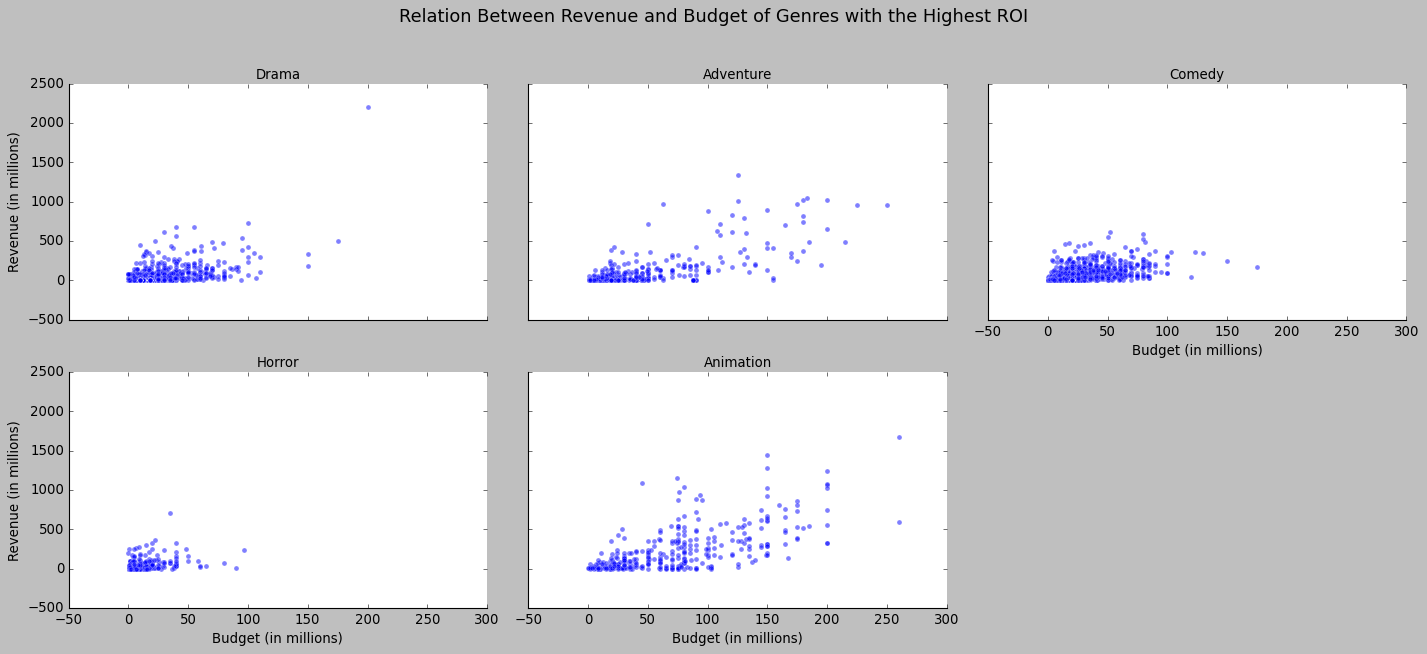

In [97]:
sns.set_style("darkgrid")     #Sets the grid style under seaborn.
plt.style.use("classic")      #Sets the visual style under matplotlib.
fig = plt.figure(figsize = (15, 10))  #Sets the size of the figure.
g = sns.FacetGrid(data = movies_3,  
                  col = "genre",
                  col_wrap = 3,
                  height = 4,
                  aspect = 1.5)    #Creates a grid of subplots where column is based on the "genre" values and "col_wrap" specifies the number of columns to be present in the graph, along with the size (height and aspect) mentioned.
g.map_dataframe(sns.scatterplot,
                x = "budget (in millions)",
                y = "revenue (in millions)",
                alpha = 0.5)       #Creates scatter plots with x values, y values, and alpha(transparency level) as mentioned.
g.set_axis_labels("Budget (in millions)", "Revenue (in millions)")  #Sets the axes labels.
g.set_titles(col_template = "{col_name}",
            row_template = "{row_name}")  #Modifies the titles of each subplot.
g.fig.suptitle("Relation Between Revenue and Budget of Genres with the Highest ROI",
              y = 1.02,
              fontsize = 16)  #Sets the title for the entire graph along with its placement and font size.
plt.savefig("relation_between_the_data_of_genres_with_the_highest_ROI.png", format = "png", dpi = 300)  #Exports the visualisation as an image file.
plt.tight_layout()  #Adjusts the placing between subplots automatically.
plt.show()

This small multiples graph has been created to compare the budget and revenue of the 5 genres with the most returns.
X axis shows budget (in millions) and Y axis shows revenue (in millions) whereas the columns are based on genres.
Genres like "Animation" and "Adventure" have movies with both low as well as high budget and revenue.
"Drama" and "Comedy" can be seen as low and medium budget and revenue movies.
"Horror" movies show low budget and low revenue movies.
Most of the high budget movies in these genres also so high revenue.

Decision for the investors:-
1. For investors willing to take risk for high return, "Adventure" and "Animation" are good options as their high budget movies also generate high revenue.
2. For investors willing to take some risk, "Comedy" and "Drama" are good options as both the genres show low to medium budget values.
3. For investors looking for minimum risk, "Horror" movies are suitable as the budget and revenue is less.

Again, all these genres have very good returns as these are the top 5 genres based on ROI.
So, even though the revenue and budget are low for "Horror" movies, the returns are high which is what attracts investors.

## Data export

In [101]:
#Saving the cleaned and wrangled DataFrames to a new CSV file.
movies.to_csv("movies_cleaned.csv", index = False)
movies_2.to_csv("movies_2_cleaned.csv", index = False)
movies_3.to_csv("movies_3_cleaned.csv", index = False)

## Conclusion

The project has helped gain valuable insights on the movies dataset. However, there were certain limitations to overcome. First, during data cleaning it was found that few values under “IMDB_rating” and “vote_count” were missing. So, after some external research, all of these values except one were filled. The data for the one missing value in both the columns was not found anywhere and hence had to be filled with “0”. Second, the bar plot showcasing top genres with highest ROI shows “History” as the top genre. But after further analysis it was found that only one movie belonged to this genre. Hence the “History” genre had to be removed and only the genres with more than 300 movies (among the genres with highest ROI) was considered for further analysis. 

Future Improvements: Since this project focuses on providing investors/producers with data to assist in investment, it would be better to consider factors like IMDB rating as well as the star/director of the movie, along with the ROI (which was used for analysis in this project). Analysis based on the influence of particular stars/directors in the movie as well as the role of IMDB ratings in the success of the films would further help investors in taking decisions.

This project provided great insights based on the options of investment in the movie industry. The aim of this project was also achieved by reaching all the objectives. It was found that the profit of movies shows an upward trend through the years which makes it a good investment option. Second, the genres with highest ROI was identified to guide investors in taking the right decision. Lastly, these top genres were analysed and the risk level associated with these genres were revealed.

Recommendations:  For investors looking for a good rate of return with minimum risk and investment, “Horror” movies is the best option. Whereas investors who have good amount of funds and are willing to take risk for the possibility of a higher return, “Adventure” and “Animation” movies are good options. 


## Reference List / (Annotated) Bibliography

1.	Ali, N.M., Abd El Hamid, M.M. and Youssif, A., 2019. Sentiment analysis for movies reviews dataset using deep learning models. International Journal of Data Mining & Knowledge Management Process (IJDKP) Vol, 9. Relevance of this source: Used to justify a statement in the literature review.
2.	Friedlob, G.T. and Plewa Jr, F.J., 1996. Understanding return on investment. John Wiley & Sons. Relevance of this source: Used to justify a statement in the literature review.
3.	Garcia-del-Barrio, P. and Zarco, H., 2017. Do movie contents influence box-office revenues?. Applied Economics, 49(17), pp.1679-1688. Relevance of this source: Assisted in grouping columns while filling missing revenue values by calculating the median revenue.
4.	Kim, I. and Kim, H., 2018. The More, the Better? Movie Genre and Performance Analysis. Journal of Business and Educational Leadership, 7(1), pp.105-113. Relevance of this source: Assisted in grouping columns while filling missing budget values by calculating the median budget.
5.	Kumar, A.M., Goh, J.Y., Tan, T.H. and Siew, C.S., 2022. Gender stereotypes in Hollywood movies and their evolution over Time: Insights from network analysis. Big Data and Cognitive Computing, 6(2), p.50. Relevance of this source: Used to justify a statement in the literature review.
6.	Martin Bel (2023) Line Charts in Python: Matplotlib, Seaborn, Plotly & Plotnine. 6 April. Available at: https://youtu.be/P6TLbGx0SOY?si=pnNFrj2dQ3vPYtK1 (Accessed: 25 December 2024). Relevance of this source: Assisted in making the small multiples visualisation.
7.	OpenAI (2025) ChatGPT (Version 2) [AI Model]. Available at: https://chat.openai.com (Accessed on: 2 January 2025). Relevance of this source: Used for exploring the various libraries and functions of Python.
8.	Ravid, S.A., 1999. Information, blockbusters, and stars: A study of the film industry. The Journal of Business, 72(4), pp.463-492. Relevance of this source: Assisted in grouping columns while filling missing budget values by calculating the median budget.
9.	Scott, A., 2002. A new map of Hollywood: the production and distribution of American motion pictures. Regional studies, 36(9), pp.957-975. Relevance of this source: Assisted in grouping columns while filling missing budget values by calculating the median budget.
10.	Sinha, A.A., Krishna, S.V., Shedge, R. and Sinha, A., 2017, August. Movie production investment decision system. In 2017 International Conference on Energy, Communication, Data Analytics and Soft Computing (ICECDS) (pp. 494-498). IEEE. Relevance of this source: Used to justify a statement in the introduction.
11.	Teti, E., 2013. The dark side of the movie. The difficult balance between risk and return. Management Decision, 51(4), pp.730-741. Relevance of this source: Assisted in grouping columns while filling missing budget values by calculating the median budget. Also used in grouping columns while filling missing revenue values by calculating the median revenue.
12.	The Tech Express (2024) Python Seaborn Data Visualisation – BAR PLOT WITH ANNOTATION. 10 February. Available at: https://youtu.be/TbhPF1_gZ1E?si=8VYANXfCZ0gjHrao (Accessed: 24 December 2024). Relevance of this source: Provided knowledge about annotations for seaborn bar plots.
13.	Walls, W.D. and McKenzie, J., 2012. The changing role of Hollywood in the global movie market. Journal of Media Economics, 25(4), pp.198-219. Relevance of this source: Assisted in grouping columns while filling missing revenue values by calculating the median revenue.
14.	Xiao, X., Cheng, Y. and Kim, J.M., 2021. Movie title keywords: a text mining and exploratory factor analysis of popular movies in the United States and China. Journal of Risk and Financial Management, 14(2), p.68. Relevance of this source: Used to justify a statement in the literature review.
15.	Zhang, W. and Skiena, S., 2009, September. Improving movie gross prediction through news analysis. In 2009 IEEE/WIC/ACM International Joint Conference on Web Intelligence and Intelligent Agent Technology (Vol. 1, pp. 301-304). IEEE. Relevance of this source: Used to justify a statement in the literature review.
